In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/consumer_complaints_copy.csv')

In [ ]:
df_new = data1.copy()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [ ]:
df_new.shape

(555957, 18)

In [ ]:
df_new.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,12-05-2014,Debt collection,Mortgage,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"(Former)Shapiro, Swertfeger & Hasty, LLP",GA,30005,NaN,NaN,Referral,12-12-2014,Untimely response,No,No,1144671
1,11-10-2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"(Former)Shapiro, Swertfeger & Hasty, LLP",DE,19803,NaN,NaN,Referral,11/19/2014,Untimely response,No,No,1109287
2,08/26/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"(Former)Shapiro, Swertfeger & Hasty, LLP",GA,30014,NaN,NaN,Referral,09-08-2015,Untimely response,No,No,1536776
3,01/16/2014,Debt collection,Mortgage,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"(Former)Shapiro, Swertfeger & Hasty, LLP",GA,30087,NaN,NaN,Referral,02-11-2014,Untimely response,No,No,671539
4,06/25/2015,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,My mortgage company has misrepresented themsel...,NaN,"1st 2nd Mortgage Company Of NJ, Inc.",NJ,074XX,NaN,Consent provided,Web,07/22/2015,Closed,Yes,No,1437506


In [ ]:
#we Requred only these features
df_req= df_new[['product','issue', 'sub_issue']]

In [ ]:
df_req.head()

,product,issue,sub_issue
0,Debt collection,Disclosure verification of debt,Not given enough info to verify debt
1,Mortgage,"Loan servicing, payments, escrow account",NaN
2,Mortgage,"Loan modification,collection,foreclosure",NaN
3,Debt collection,Disclosure verification of debt,Not given enough info to verify debt
4,Mortgage,"Application, originator, mortgage broker",NaN


In [ ]:
df_req= df_req.fillna('')

In [ ]:
df_req.head(10)

,product,issue,sub_issue
0,Debt collection,Disclosure verification of debt,Not given enough info to verify debt
1,Mortgage,"Loan servicing, payments, escrow account",
2,Mortgage,"Loan modification,collection,foreclosure",
3,Debt collection,Disclosure verification of debt,Not given enough info to verify debt
4,Mortgage,"Application, originator, mortgage broker",
5,Debt collection,Cont'd attempts collect debt not owed,Debt is not mine
6,Mortgage,"Application, originator, mortgage broker",
7,Mortgage,"Loan servicing, payments, escrow account",
8,Mortgage,"Loan servicing, payments, escrow account",
9,Mortgage,"Loan modification,collection,foreclosure",


***Data Preprocessing***


In [ ]:
df_req['issue']=df_req['issue'].str.replace('[^\w\s]',' ')


<ipython-input-37-4929efecdd1e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_req['issue']=df_req['issue'].str.replace('[^\w\s]',' ')


In [ ]:
df_req.tail()

,product,issue,sub_issue
555952,Debt collection,Improper contact or sharing of info,Contacted employer after asked not to
555953,Debt collection,Cont d attempts collect debt not owed,Debt was discharged in bankruptcy
555954,Debt collection,Disclosure verification of debt,Not given enough info to verify debt
555955,Debt collection,Disclosure verification of debt,Not given enough info to verify debt
555956,Debt collection,False statements or representation,Impersonated an attorney or official


***LOWERCASE THE SENTS***

In [ ]:
df_req = df_req.apply(lambda x: x.astype(str).str.lower())

In [ ]:
df_req.head()

,product,issue,sub_issue
0,debt collection,disclosure verification of debt,not given enough info to verify debt
1,mortgage,loan servicing payments escrow account,
2,mortgage,loan modification collection foreclosure,
3,debt collection,disclosure verification of debt,not given enough info to verify debt
4,mortgage,application originator mortgage broker,


In [ ]:
df_req['Issue'] = df_req['issue'] + ' ' + df_req['sub_issue']

In [ ]:
df_req=df_req.drop("issue", axis= 1)

In [ ]:
df_req=df_req.drop("sub_issue", axis= 1)

In [ ]:
df_req.head()

,product,Issue
0,debt collection,disclosure verification of debt not given enou...
1,mortgage,loan servicing payments escrow account
2,mortgage,loan modification collection foreclosure
3,debt collection,disclosure verification of debt not given enou...
4,mortgage,application originator mortgage broker


***REMOVE PUNTUATIONS***

In [ ]:
df_req['Issue']=df_req['Issue'].str.replace('[^\w\s]','')

<ipython-input-45-6faec5853308>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_req['Issue']=df_req['Issue'].str.replace('[^\w\s]','')


In [ ]:
df1= df_req.copy()

In [ ]:
df1.head()

,product,Issue
0,debt collection,disclosure verification of debt not given enou...
1,mortgage,loan servicing payments escrow account
2,mortgage,loan modification collection foreclosure
3,debt collection,disclosure verification of debt not given enou...
4,mortgage,application originator mortgage broker


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df1['Issue'] = df1['Issue'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Function to remove stop words using spaCy
def remove_stopwords_spacy(text):
    doc = nlp(text)
    filtered_words = [token.text for token in doc if not token.is_stop]
    return ' '.join(filtered_words)

df1['Issue_clean'] = df1['Issue'].apply(remove_stopwords_spacy)

***STEMMING***

In [ ]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Function to apply stemming to a single text
def apply_stemming(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply the stemming function to the 'TextColumn' of the DataFrame
df1['Issue'] = df1['Issue'].apply(apply_stemming)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df1.head()

***LEMMATIZATION***

In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')      # Download the Punkt tokenizer data (only required once)
nltk.download('wordnet')    # Download the WordNetLemmatizer data (only required once)

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Function to apply lemmatization to a single text
def apply_lemmatization(text):
  words = word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_words)



In [ ]:
# Apply the lemmatization function to the 'TextColumn' of the DataFrame
df1['Issue1'] = df1['Issue'].apply(apply_lemmatization)

In [ ]:
df1.head()

,product,Issue,Issue1
0,debt collection,disclosure verification of debt not given enou...,disclosure verification of debt not given enou...
1,mortgage,loan servicing payment escrow account,loan servicing payment escrow account
2,mortgage,loan modification collection foreclosure,loan modification collection foreclosure
3,debt collection,disclosure verification of debt not given enou...,disclosure verification of debt not given enou...
4,mortgage,application originator mortgage broker,application originator mortgage broker


In [ ]:
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



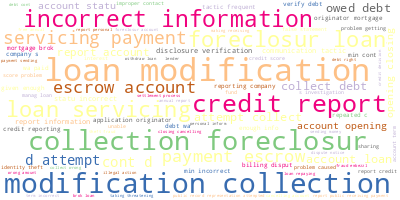

In [ ]:
# Visualization of words from 'Issues'
ps = PorterStemmer()
df1['Issue1']=df1['Issue1'].map(lambda x: ps.stem(x))
long_string = ','.join(list(df1['Issue1'].values))
print(long_string)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=10,colormap = 'Accent')
wordcloud.generate(long_string)
wordcloud.to_image()

***NOW ITS TIME TO BUILD A ML MODEL***

In [ ]:
#STEP 1 IMPORTING ALL REQURED LIBRARIES
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
 #STEP 2 #Tfidf vectorizer TO CONVERT TEXT TO VECTOR
vectorizer = TfidfVectorizer()  # Use TF-IDF representation
X = vectorizer.fit_transform(df1['Issue1'])

In [ ]:
X.shape

(555957, 313)

In [ ]:
# Step 3: SPLIT DATA FOR TRAINING AND TESTING, I USED 30% DATA FOR TEST AND 70% FOR TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, df1['product'], test_size=0.3, random_state=42)

In [ ]:
# Step 4: USNING SUPPORT VECTOR CLASSIFIER FOR FITTING THE MODEL
model = SVC(kernel='linear', C=1)

In [ ]:

# Step 5: Train the Model
model.fit(X_train, y_train)

In [ ]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9875650526416768


In [ ]:
# Step 7: Predict Product
# Write your Issue Statement
new_issue_statement = "Loan modification,collection,foreclosure"
new_issue_vector = vectorizer.transform([new_issue_statement])
predicted_product = model.predict(new_issue_vector)[0]
print("Yor Product is ==>", predicted_product)

Yor Product is ==> mortgage
